# <span style="color: hotpink">Project 3: Regression
### <span style="color: hotpink">Fabiola Rojas</span>
---

## <span style="color: hotpink">The Problem</span> 

In today’s rapidly evolving job market, understanding salary trends is crucial for both employers and employees. Data engineering is a high-demand field, and salaries can vary significantly based on factors such as experience level, job title, employment type, company location, and remote work options. This project is particularly important to me as I am soon starting a data engineering position myself. Understanding salary trends and the factors that influence compensation will not only help me navigate my own career but also provide valuable insights for others entering the field. The goal of this project is to build a regression model that predicts salaries in USD based on these attributes. 

---

## <span style="color: hotpink">The Data

For this project, I am using the [Data Engineer Salary in 2024 dataset](https://www.kaggle.com/datasets/chopper53/data-engineer-salary-in-2024/data) from Kaggle, which provides salary information in both local currency and standardized USD. The dataset contains key employment attributes, including:  

- Experience level (Entry-Level, Mid-Level, Senior Engineer)
- Employment type (Full-time, Part-time, Contract, Freelance)
- Job title (e.g., AI Engineer, Big Data Engineer)
- Remote work ratio (0%, 50%, 100% remote)
- Company size (Small, Medium, Large)
- Company and employee location

---

## <span style="color: hotpink">What is regression and how does it work?


Regression is a supervised learning technique used for predicting continuous numerical values based on input features. It helps establish relationships between independent variables (predictors) and a dependent variable (target).

One of the most commonly used regression methods is linear regression, which assumes a linear relationship between the independent variables and the target variable. The equation for a simple linear regression model is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

where:

- $y$ is the predicted salary (dependent variable).
- $x_1, x_2, ..., x_n$ are the independent variables (e.g., experience level, job title).
- $\beta_0$ is the intercept (the predicted value when all features are zero).
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients that determine the impact of each feature.
- $\epsilon$ is the error term (residual), representing the difference between actual and predicted values.  

Linear regression finds the best-fitting line by minimizing the sum of squared residuals—the differences between actual and predicted values. The two most common approaches to estimate the coefficients $\beta$ are Ordinary Least Squares (OLS) and Gradient Descent. OLS directly computes the optimal coefficients by minimizing the sum of squared residuals. Gradient Descent is an optimization technique that minimizes the cost function by iteratively updating the coefficients.

---


## <span style="color: hotpink">Data Understanding and Pre-Processing

<span style="color: purple">Let's start working with the dataset.

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("/Users/fabiolarojas/Documents/itcs3162/salaries (2) 2.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<span style="color: purple">I won't be needing the unstandardized salary column or the salary currency column, so I'll drop these and rename the USD salary column to simplify things a little bit.

In [11]:
df = df.drop(['salary', 'salary_currency'], axis=1)
df = df.rename(columns={'salary_in_usd':'salary_usd'})
df.head()

,work_year,experience_level,employment_type,job_title,salary_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary_usd          16534 non-null  int64 
 5   employee_residence  16534 non-null  object
 6   remote_ratio        16534 non-null  int64 
 7   company_location    16534 non-null  object
 8   company_size        16534 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


<span style="color: purple">There are no nulls so we won't have to do any extra work here.

In [37]:
df.duplicated().sum()

np.int64(6422)

<span style="color: purple">There are 6,422 duplicate rows which account for over 1/3 of the data. This could definitely be a problem, seeing as I don't find it very likely that these are legitimate repeats given the amount of unique salary and job title values there are just in the preview of the data. This is probably an error in the data entry and it is best to remove the duplicates to avoid overrepresentation of certain categories that could skew the results.

In [48]:
df = df.drop_duplicates()
df.shape

(10112, 9)

<span style="color: purple">The dataset is now down to 10,112 rows. Let's view the counts for each class in our features.

In [50]:
features = df.drop(columns=['salary_usd'])
for col in features:
    print(df[col].value_counts())
    print()

work_year
2023    4632
2024    4073
2022    1116
2021     216
2020      75
Name: count, dtype: int64

experience_level
SE    5950
MI    2761
EN    1010
EX     391
Name: count, dtype: int64

employment_type
FT    10032
PT       38
CT       28
FL       14
Name: count, dtype: int64

job_title
Data Engineer                1842
Data Scientist               1835
Data Analyst                 1383
Machine Learning Engineer     945
Analytics Engineer            354
                             ... 
BI Data Engineer                1
Marketing Data Engineer         1
Data Science Tech Lead          1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 155, dtype: int64

employee_residence
US    8326
GB     533
CA     402
DE      97
ES      78
      ... 
IQ       1
BG       1
JE       1
RS       1
LU       1
Name: count, Length: 88, dtype: int64

remote_ratio
0      6393
100    3472
50      247
Name: count, dtype: int64

company_location
US    8377
GB     541
C

<span style="color: purple">There are a few things to note after viewing the value counts:  
- <span style="color: purple">Most of the data comes from work years 2023 and 2024. Since it's pretty recent we should have pretty accurate data for predicting salaries.  
- <span style="color: purple">There is a fourth class for experience_level that was not defined in the dataset description: 'EX'. It's possible that it means Executive. We can make this assumption and not worry too much about the effects on the model as it is the least-represented class.  
- <span style="color: purple">Most of the employment types are full-time, and this is okay because other employment types for this kind of career are pretty unheard of anyway.  
- <span style="color: purple">Job title gets tricky because there are 155 unique values. The most common are data engineer, data scientist, data analyst, and machine learning engineer. There are lots of different titles for similar jobs and it is unclear the best way to encode this feature.  
- <span style="color: purple">The most common employee residence and company location is the US, followed by Great Britain, Canada, and 85 other countries. I will group these other countries together as "other."  
- <span style="color: purple">Most jobs are fully onsite, about a third are fully remote, and few are hybrid.  
- <span style="color: purple">Most companies are medium sized, some are large, and few are small.  


In [60]:
value_counts_df = value_counts.reset_index()
value_counts_df.head(20)


,job_title,count
0,Data Engineer,1842
1,Data Scientist,1835
2,Data Analyst,1383
3,Machine Learning Engineer,945
4,Analytics Engineer,354
5,Research Scientist,320
6,Data Architect,283
7,Research Engineer,218
8,Data Science,206
9,ML Engineer,172


<span style="color: purple">Above is an expanded view of some of the most common values for job_title. Some common major categories could be engineer, analyst, scientist, manager, but it may not make sense to group them in this way. I'm not sure the difference in the roles of a data analyst and a research analyst, if any, but grouping them on the basis that they're both 'analysts' may be inaccurate. I will have to do some extra research on these job titles to find the best way to group them. I don't want to have to go through all 155 values, so I will try to focus on the most common classes. The first 13 account for nearly 80% of the data, so I will try to consolidate these. I will leave this for later on in the modeling in case simpler models don't perform well enough.

<span style="color: purple">I'll go ahead and reduce the cardinality of employee_residence and company_location by labeling all countries not in ['US', 'GB', 'CA'] as 'Other'.

In [89]:
top_countries = ['US', 'GB', 'CA']

df.loc[:, 'employee_residence'] = df['employee_residence'].apply(
    lambda x: x if x in top_countries else 'Other'
)

df.loc[:, 'company_location'] = df['company_location'].apply(
    lambda x: x if x in top_countries else 'Other'
)

print(df['employee_residence'].value_counts())

print(df['company_location'].value_counts())

employee_residence
US       8326
Other     851
GB        533
CA        402
Name: count, dtype: int64
company_location
US       8377
Other     790
GB        541
CA        404
Name: count, dtype: int64


## <span style="color: hotpink">Visualizations

<span style="color: purple">Before moving on to encoding, let's see what insights we can gain from visualizations.

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='salary_usd', ylabel='Count'>

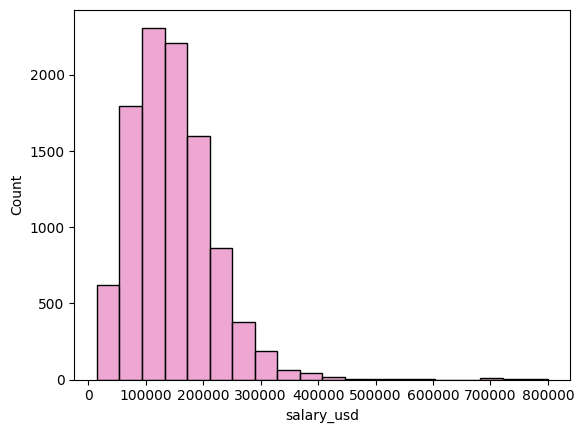

In [102]:
sns.histplot(df['salary_usd'], bins=20, color='#e78ac3')

<span style="color: purple">It looks like the target column has some outliers. Let's see how many there are and if it makes sense to remove them.

In [126]:
Q1 = df['salary_usd'].quantile(0.25)
Q3 = df['salary_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary_usd'] < lower_bound) | (df['salary_usd'] > upper_bound)]
print(f'number of outliers: {len(outliers)}')

number of outliers: 174


<span style="color: purple">174 outliers accounts for about 1% of the data. They probably aren't necessary, but it's possible they are legitimate values that belong to senior and executive level positions. Let's check.

Text(0.5, 1.0, 'Salary Outliers by Experience Level')

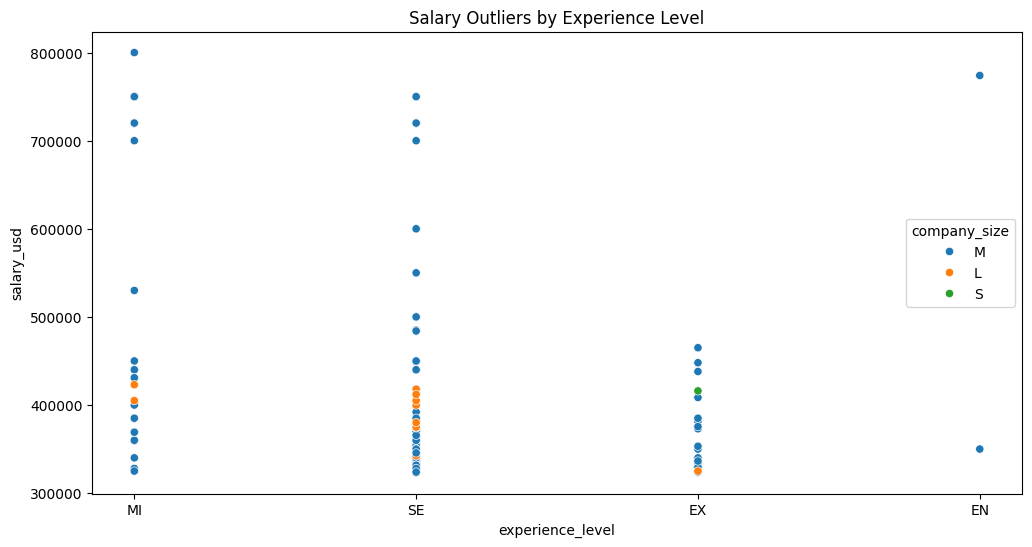

In [161]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='experience_level', y='salary_usd', hue='company_size', data=outliers)
plt.title("Salary Outliers by Experience Level")
#plt.yscale('log')

<span style="color: purple">It looks like the highest outliers belong to the mid-level engineers which seems highly unlikely. One even belongs to an entry-level engineer which must be an error. Many do belong to senior engineers, but few belong to executives. It is probably best to remove the outliers.

In [139]:
df = df[(df['salary_usd'] >= lower_bound) & (df['salary_usd'] <= upper_bound)].copy()
df.shape

(9938, 9)

<Axes: xlabel='employment_type'>

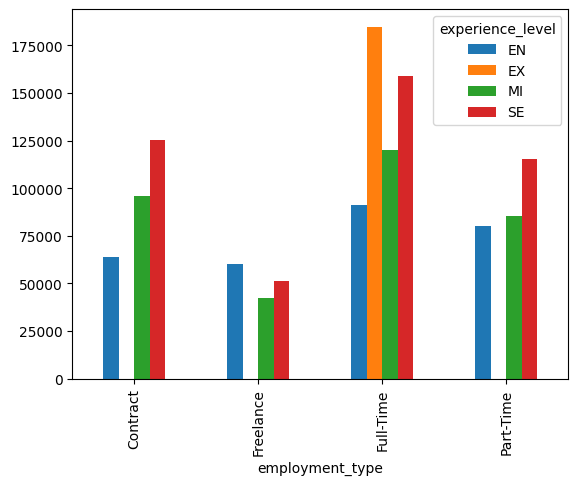

In [190]:
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-Time', 'PT': 'Part-Time', 
    'CT': 'Contract', 'FL': 'Freelance'
})
df.groupby(['employment_type', 'experience_level'])['salary_usd'].mean().unstack().plot(kind='bar')

/var/folders/l6/r_xvzzfd4bz5k_gjy82lbn6r0000gn/T/ipykernel_39608/3527641146.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




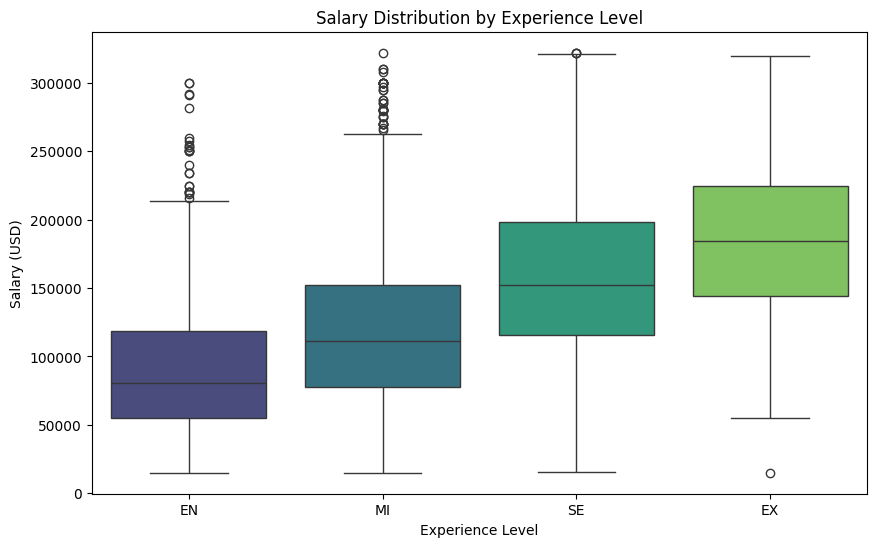

In [208]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_usd', 
            order=['EN', 'MI', 'SE', 'EX'], palette='viridis')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

Based on this visualization we can confirm that EX probably does mean Executive-Level Engineer as the median salary is highest for this class. As expected, salaries increased with level of experience, so this feature is important for predicting salaries. There is some more variation for EN and MI level engineers. This could be explained by the actual job title, location, or company size.

### References
1. ChatGPT for debugging and LaTeX.